In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Load the dataset
df = pd.read_csv('heart.csv')

# Display the first few rows of the dataframe
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Check for missing values
print(df.isnull().sum())

# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [4]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [5]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.8360655737704918
Confusion Matrix:
[[24  5]
 [ 5 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



## Model Performance Evaluation

### Accuracy
- **Accuracy: 0.836**: This means that 83.6% of the predictions made by the model are correct. In general, an accuracy above 80% is considered good, but this also depends on the specific problem and the acceptable error margin in the domain.

### Confusion Matrix

[[24 5]
[ 5 27]]

- **True Positives (TP): 27**: The model correctly predicted 27 cases as having heart disease (class 1).
- **True Negatives (TN): 24**: The model correctly predicted 24 cases as not having heart disease (class 0).
- **False Positives (FP): 5**: The model incorrectly predicted 5 cases as having heart disease when they do not.
- **False Negatives (FN): 5**: The model incorrectly predicted 5 cases as not having heart disease when they do.

### Classification Report
- **Precision**: The ratio of correctly predicted positive observations to the total predicted positives. A precision of 0.83 for class 0 and 0.84 for class 1 indicates that when the model predicts a class, it is correct about 83-84% of the time.
- **Recall**: The ratio of correctly predicted positive observations to all observations in the actual class. A recall of 0.83 for class 0 and 0.84 for class 1 means the model correctly identifies 83-84% of actual positive cases.
- **F1-Score**: The weighted average of Precision and Recall. An F1-score of 0.83-0.84 indicates a balance between precision and recall.


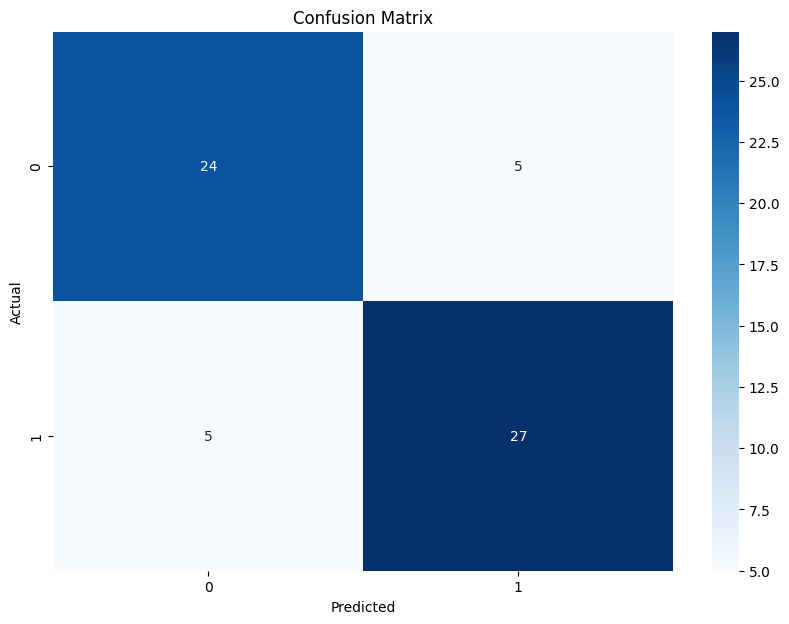

In [6]:
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Confusion Matrix

The confusion matrix is a visual representation of the performance of a classification model. In this plot:

- **Figure Size**: The plot is set to a size of 10x7 inches.
- **Heatmap**: The confusion matrix is displayed as a heatmap using the `seaborn` library, with a blue color map (`cmap='Blues'`).
- **Annotations**: The cells in the heatmap are annotated with the corresponding counts (`annot=True`), formatted as integers (`fmt='d'`).
- **Axes Labels**: 
  - The x-axis is labeled "Predicted", representing the predicted classifications by the model.
  - The y-axis is labeled "Actual", representing the true classifications from the dataset.
- **Title**: The plot is titled "Confusion Matrix".

This matrix helps to understand the number of correct and incorrect predictions made by the model, showing the counts of true positives, true negatives, false positives, and false negatives.


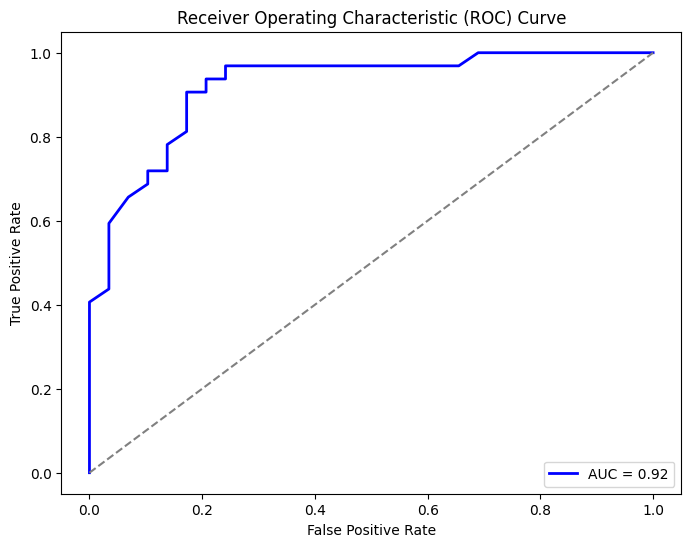

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC
y_probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


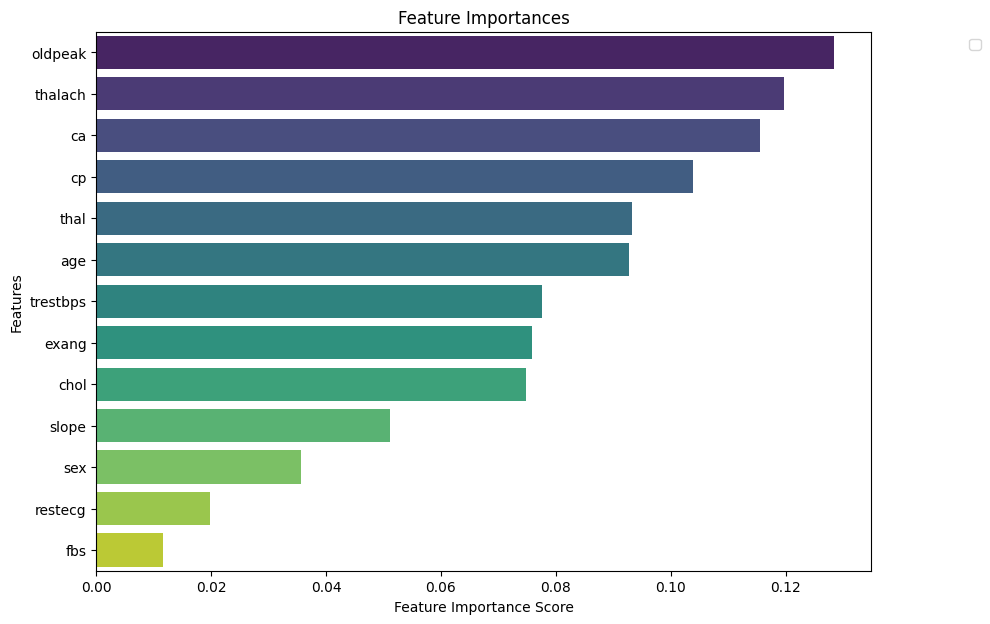

In [11]:
# Get feature importances from the model
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 7))
sns.barplot(x=feature_importances[indices], y=feature_names[indices], palette='viridis', hue=feature_names[indices])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


### Understanding the Warning in Feature Importance Plot

The warning "No artists with labels found to put in legend" is expected when plotting feature importances with seaborn's `barplot`. This is not a problem because feature importance plots typically do not require a legend. Each bar represents a feature's importance, and there are no distinct categories needing differentiation with a legenlot.


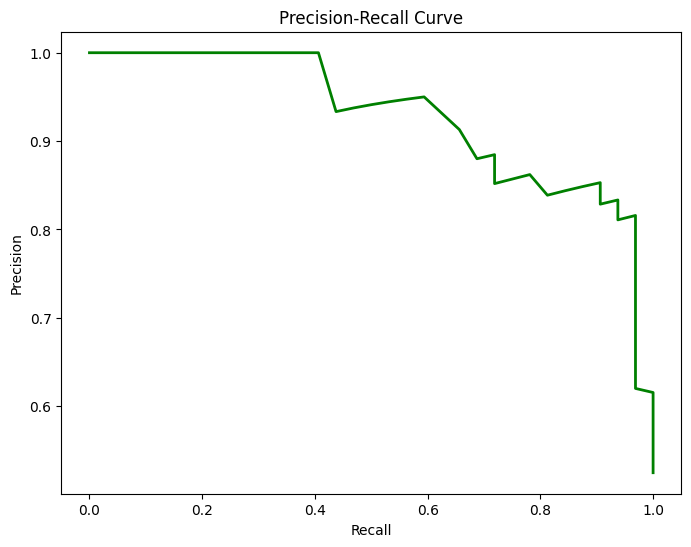

In [12]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


C:\Users\mikey\AppData\Local\Temp\ipykernel_17764\526989934.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


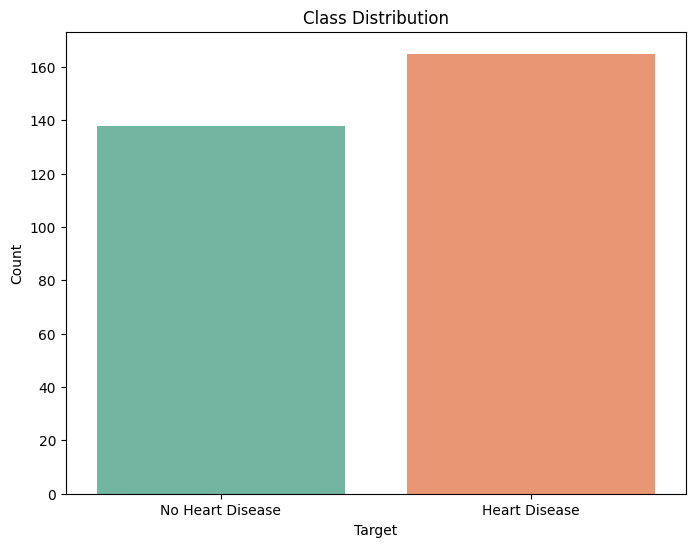

In [13]:
# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df, palette='Set2')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()


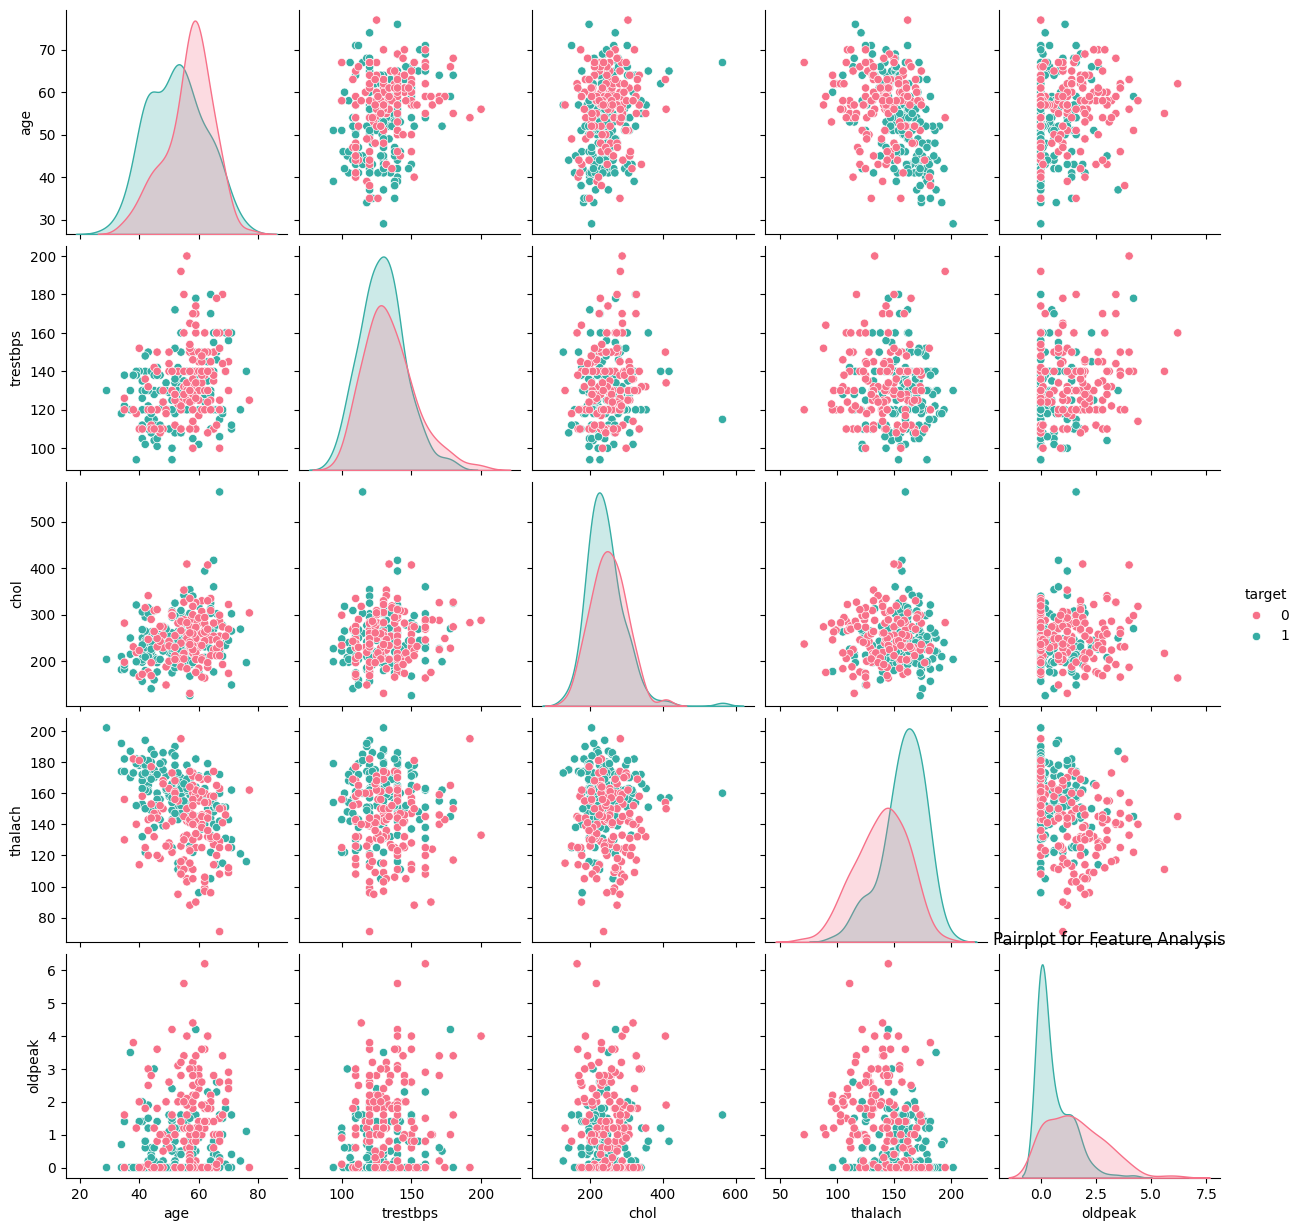

In [15]:
# Pairplot for feature analysis
sns.pairplot(df, hue='target', palette='husl', vars=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])
plt.title('Pairplot for Feature Analysis')
plt.show()


## Pairplot for Feature Analysis

The pairplot visualizes relationships between pairs of features in the dataset. Each scatter plot matrix cell shows the relationship between two variables:

- **Diagonal Plots**: Histograms showing the distribution of each feature.
- **Off-Diagonal Plots**: Scatter plots where each point represents a data point, colored by the target variable ('target' column in `df`). Different colors indicate different target classes.

This plot helps to identify potential correlations or patterns between the selected features ('age', 'trestbps', 'chol', 'thalach', 'oldpeak') and how they relate to the target variable.
